In [1]:
import cv2
from plantcv import plantcv as pcv

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread("collected_data/p1.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [4]:
s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')
binary_mask = pcv.threshold.binary(gray_img=s, threshold=85, object_type='light')

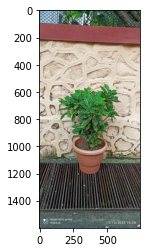

In [5]:
plt.imshow(img)
plt.show()

In [95]:
img = cv2.imread("collected_data/p2.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

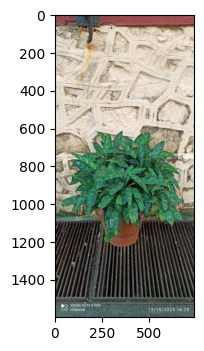

In [96]:
plt.imshow(img)
plt.show()

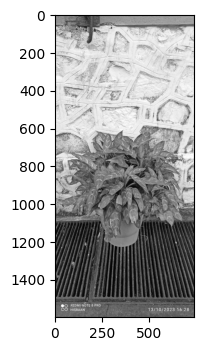

In [97]:
gray_img = pcv.rgb2gray_hsv(img, 'v')

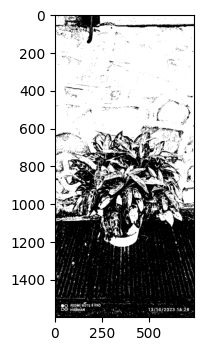

In [104]:
somemask = pcv.threshold.binary(gray_img, 120)
mask = cv2.imread("./masked_collected_data/p2._mask.jpg")
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

In [53]:
type(mask)

numpy.ndarray

In [54]:
roi1 = pcv.roi.rectangle(img=img, x=0, y=600, h=500, w=500)

In [55]:
filtered_mask = pcv.roi.filter(mask=mask, roi=roi1, roi_type='partial')

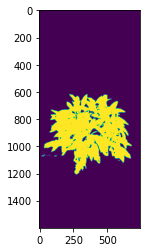

In [58]:
plt.imshow(mask)
plt.show()

# IMPORTANT

In [99]:
pcv.params.debug = "plot"
# Optionally, set a sample label name
pcv.params.sample_label = "plant"

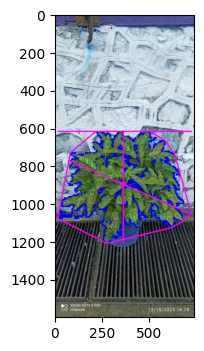

In [100]:
# Characterize object shapes
shape_image = pcv.analyze.size(img=img, labeled_mask=mask, n_labels=1)

In [101]:
# Save returned images with more specific naming
pcv.print_image(shape_image, '/home/malia/setaria_shape_img.png')

# Access data stored out from analyze.size
plant_obs = pcv.outputs.observations['plant_1']

In [102]:
plant_obs['height']

{'trait': 'height',
 'method': 'plantcv.plantcv.analyze.size',
 'scale': 'pixels',
 'datatype': "<class 'int'>",
 'value': 592,
 'label': 'pixels'}

In [7]:
# cv2.imshow(" ", binary_mask)

# cv2.imshow(" ", img)
cv2.imshow("1",cv2.resize(img,(300,500)))
# cv2.imshow("2",cv2.resize(img2,(300,500)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
color_analysis = pcv.color.analyze_color(img)

# Print the color analysis results
print(color_analysis)

AttributeError: module 'plantcv.plantcv' has no attribute 'color'

In [12]:
import cv2
import numpy as np

img1 = cv2.imread("./masked_collected_data/p2._mask.jpg")
img2 = cv2.imread("./masked_collected_data/p2(2).._mask.jpg")
img2 = cv2.resize(img2,(img1.shape[1], img1.shape[0]))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

def mse(img1, img2):
   h, w = img1.shape
   diff = cv2.subtract(img1, img2)
   err = np.sum(diff**2)
   mse_val = err/(float(h*w))
   print(mse_val)
   return mse_val, diff

mse_val, diff = mse(img1, img2)

0.219226150202977


In [18]:
if(mse_val>0.5):
   print("There has been significant growth detected in the plant")
else:
   print("There is no significant growth in the plant")
# cv2.imshow("difference", diff)
resized_image = cv2.resize(diff, (300, 500))
# cv2.imshow("Difference", resized_image)
cv2.imshow("1",cv2.resize(img1,(300,500)))
cv2.imshow("2",cv2.resize(img2,(300,500)))
cv2.waitKey(0)
cv2.destroyAllWindows()

There is no significant growth in the plant


In [38]:
import numpy as np

def find_bounding_box(mask):
    # Find indices of non-zero pixels (white) in the mask
    nonzero_indices = np.transpose(np.nonzero(mask))

    if len(nonzero_indices) == 0:
        return None  # No white pixels found

    # Calculate bounding box coordinates
    top = np.min(nonzero_indices[:, 0])
    bottom = np.max(nonzero_indices[:, 0])
    left = np.min(nonzero_indices[:, 1])
    right = np.max(nonzero_indices[:, 1])

    # Calculate width and height of the bounding box
    width = right - left + 1
    height = bottom - top + 1

    bounding_box = {'top': top, 'bottom': bottom, 'left': left, 'right': right, 'width': width, 'height': height}

    if bounding_box:
        print("Bounding box coordinates:", bounding_box)
    else:
        print("No plant mask found.")
        
find_bounding_box(img1)
find_bounding_box(img2)

Bounding box coordinates: {'top': 615, 'bottom': 1209, 'left': 15, 'right': 721, 'width': 707, 'height': 595}
Bounding box coordinates: {'top': 551, 'bottom': 1599, 'left': 0, 'right': 737, 'width': 738, 'height': 1049}


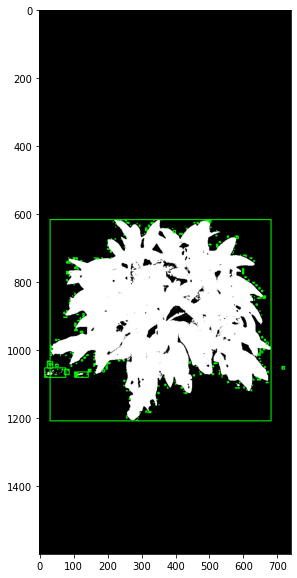

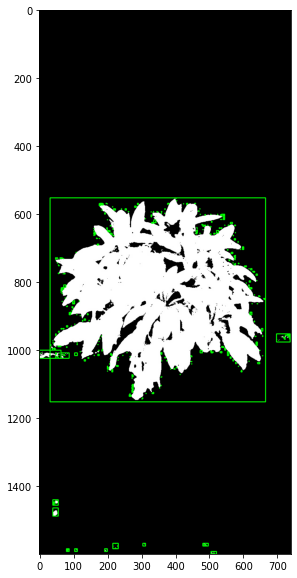

In [37]:
import cv2
import numpy as np

def calculate_mask_area(mask):
    # Calculate the area of white pixels in the mask
    return cv2.countNonZero(mask)

def draw_bounding_box(image, mask):
    # Find contours of white regions in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding box for each contour
    for contour in contours:
        # Get bounding box coordinates
        x, y, w, h = cv2.boundingRect(contour)
        # Draw bounding box on the image
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Load the mask images
img1 = cv2.imread("./masked_collected_data/p2._mask.jpg")
img2 = cv2.imread("./masked_collected_data/p2(2).._mask.jpg")

# img1 = cv2.imread("./masked_collected_data/p1._mask.jpg")
# img2 = cv2.imread("./masked_collected_data/p1(2)._mask.jpg")
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Convert to grayscale
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Calculate the areas of white pixels in the masks
area_mask1 = calculate_mask_area(gray_img1)
area_mask2 = calculate_mask_area(gray_img2)

# Compare the areas
# if area_mask2 > area_mask1:
#     print("The second mask has grown larger than the first mask.")
# elif area_mask2 < area_mask1:
#     print("The second mask has shrunk smaller than the first mask.")
# else:
#     print("The sizes of the masks are the same.")

# Draw bounding boxes on the images
draw_bounding_box(img1, gray_img1)
draw_bounding_box(img2, gray_img2)

# Display the images with bounding boxes
# cv2.imshow("Mask 1 with Bounding Box", cv2.resize(img1,(300,500)))
# cv2.imshow("Mask 2 with Bounding Box", cv2.resize(img2,(300,500)))
# cv2.waitKey(0)
# cv2.destroyAllWindows()


plt.figure(figsize=(10,10))
plt.imshow(img1)
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(img2)
plt.show()

The second mask has shrunk smaller than the first mask.


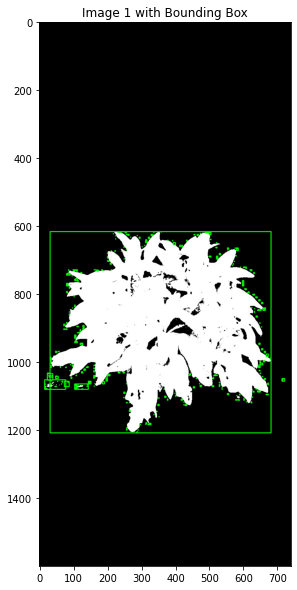

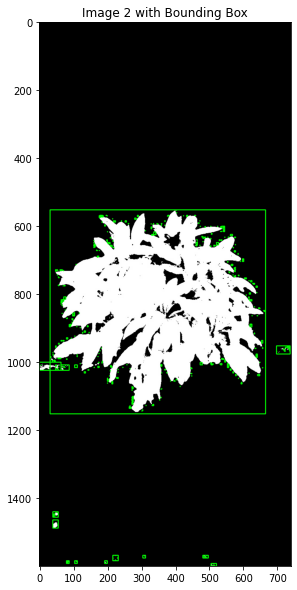

Bounding Box Coordinates for Image 1:
Top-left: (16, 616)
Bottom-right: (720, 1208)

Bounding Box Coordinates for Image 2:
Top-left: (0, 552)
Bottom-right: (736, 1600)


In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_mask_area(mask):
    # Calculate the area of white pixels in the mask
    return cv2.countNonZero(mask)

def draw_bounding_box(image, mask):
    # Find contours of white regions in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Initialize variables to store bounding box coordinates
    x_min, y_min, x_max, y_max = float('inf'), float('inf'), -1, -1

    # Draw bounding box for each contour
    for contour in contours:
        # Get bounding box coordinates
        x, y, w, h = cv2.boundingRect(contour)
        
        # Update min and max coordinates
        x_min = min(x_min, x)
        y_min = min(y_min, y)
        x_max = max(x_max, x + w)
        y_max = max(y_max, y + h)

        # Draw bounding box on the image
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Return the coordinates of the bounding box
    return x_min, y_min, x_max, y_max

# Load the mask images
img1 = cv2.imread("./masked_collected_data/p2._mask.jpg")
img2 = cv2.imread("./masked_collected_data/p2(2).._mask.jpg")
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Convert to grayscale
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Calculate the areas of white pixels in the masks
area_mask1 = calculate_mask_area(gray_img1)
area_mask2 = calculate_mask_area(gray_img2)

# Compare the areas
if area_mask2 > area_mask1:
    print("The second mask has grown larger than the first mask.")
elif area_mask2 < area_mask1:
    print("The second mask has shrunk smaller than the first mask.")
else:
    print("The sizes of the masks are the same.")

# Draw bounding boxes on the images and get bounding box coordinates
x_min1, y_min1, x_max1, y_max1 = draw_bounding_box(img1, gray_img1)
x_min2, y_min2, x_max2, y_max2 = draw_bounding_box(img2, gray_img2)

# Display the images with bounding boxes
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Image 1 with Bounding Box")
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Image 2 with Bounding Box")
plt.show()

# Print the bounding box coordinates for both images
print("Bounding Box Coordinates for Image 1:")
print(f"Top-left: ({x_min1}, {y_min1})")
print(f"Bottom-right: ({x_max1}, {y_max1})")

print("\nBounding Box Coordinates for Image 2:")
print(f"Top-left: ({x_min2}, {y_min2})")
print(f"Bottom-right: ({x_max2}, {y_max2})")
